<a href="https://colab.research.google.com/github/ImronRosada/Data_Science/blob/main/HW_REGRESSION_ImronRosada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMRON ROSADA<BR>
DATA SCIENTIST BATCH 29<BR>
REGULARIZED REGRESSION IN PYTHON<BR>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## `DATA UNDERSTANDING`

Memprediksi harga median rumah (`medv`) berdasarkan berbagai variabel yang mempengaruhi nilai properti di Boston.

`Deskripsi Variabel`<br>
Dataset memiliki 506 entri dan 14 kolom, termasuk:


| Nama Kolom                               | Deskripsi                                               |
|--------------------------------------------|---------------------------------------------------------|
| Criminal rate (crim)                      | Tingkat kriminalitas di suatu daerah                            |
| Residential land zoned proportion (zn)    | Persentase zona pemukiman dengan lot besar (> 25,000 sq.ft) |
| Non-retail business acres proportion (indus) | Proporsi lahan non-ritel per kota                     |
| Is bounds with river (chas)               | Dummy variabel apakah properti dekat dengan sungai Charles (1 = ya, 0 = tidak) |
| Nitrogen oxides concentration (nox)       | Konsentrasi nitrogen oksida (bagian per 10 juta)        |
| Number rooms average (rm)                 | Jumlah rata-rata kamar per rumah                        |
| Owner age proportion (age)                | Proporsi rumah yang dibangun sebelum 1940              |
| Weighted distance to cities (dis)         | Jarak tertimbang ke lima pusat kerja di Boston          |
| Accessibility index (rad)                 | Indeks aksesibilitas ke jalan tol                       |
| Tax rate (tax)                             | Pajak properti per $10,000 exp: 296 * 10 = $2.960 |
| Pupil-teacher ratio (ptratio)             | Rasio siswa-guru per kota                               |
| Black proportion (black)                  | Proporsi penduduk kulit hitam                           |
| Percent lower status (lstat)              | Persentase penduduk dengan status ekonomi rendah        |
| Median value of owner-occupied homes (medv) | Harga median rumah dalam ribuan dolar (variabel target) |

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# where is your data path
data_path = '/content/drive/My Drive/'

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_columns', None)
file_name = data_path + 'boston.csv'

In [ ]:
df = pd.read_csv(file_name)
df_boston = df.copy()
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


`Observasi`<br>
Dataset Boston Housing menunjukkan bahwa rata-rata tingkat kriminalitas (crim) adalah 3.61, dengan nilai antara 0.006 hingga 88.98, sementara persentase zona pemukiman dengan lot besar (zn) rata-rata 11.36%. Jumlah kamar per rumah (rm) rata-rata 6.28, dan proporsi rumah yang dibangun sebelum 1940 (age) rata-rata 68.57%. Pajak properti per $10.000 (tax) rata-rata 408.24, dengan rentang 187 hingga 711. Harga median rumah (medv) rata-rata 22.53 ribu dolar, dengan rentang antara 5 hingga 50 ribu dolar.

Terdapat outlier signifikan di kolom `crim`, `zn`, `black`, dan `medv`, dengan nilai ekstrem yang jauh di luar rentang data mayoritas. Kolom lainnya, seperti indus, nox, rm, dan age, tidak menunjukkan adanya outlier yang mencolok.









## `DATA PREPARATION`

Langkah-langkah yang dilakukan untuk memastikan data siap digunakan dalam analisis atau pembuatan model.

### `Duplicate Handling`

In [ ]:
len(df_boston.drop_duplicates()) / len(df_boston)

1.0

`1.0` menunjukkan bahwa tidak terdapat duplikat

In [ ]:
# Cek kembali apakah benar tidak ada duplikat
duplicates = df_boston[df_boston.duplicated(keep=False)]
print("Baris dengan duplikat:")
duplicates

Baris dengan duplikat:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Nilai pada tabel `kosong` menandakan tidak ada baris yang duplikat

### `Missing Value Handling`

In [ ]:
df_boston[df_boston.isna().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Nilai pada tabel `kosong` menandakan tidak ada baris yang bernilai kosong pada salah satu baris/kolom

In [ ]:
# percentage version
total_rows = len(df_boston)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df_boston.columns:
    missing_count = df_boston[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'crim' Has 0 missing values (0.00%)
Column 'zn' Has 0 missing values (0.00%)
Column 'indus' Has 0 missing values (0.00%)
Column 'chas' Has 0 missing values (0.00%)
Column 'nox' Has 0 missing values (0.00%)
Column 'rm' Has 0 missing values (0.00%)
Column 'age' Has 0 missing values (0.00%)
Column 'dis' Has 0 missing values (0.00%)
Column 'rad' Has 0 missing values (0.00%)
Column 'tax' Has 0 missing values (0.00%)
Column 'ptratio' Has 0 missing values (0.00%)
Column 'black' Has 0 missing values (0.00%)
Column 'lstat' Has 0 missing values (0.00%)
Column 'medv' Has 0 missing values (0.00%)


Semua kolom memiliki 0 missing values, dan persentase missing values adalah `0.00%` yang berarti tidak ada nilai yang hilang di dalam dataset

### `Outlier Handling`

In [ ]:
from scipy import stats
def check_plot(df_boston, variable):

    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_boston[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df_boston[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df_boston[variable])
    plt.title('Boxplot')
    plt.show()

In [ ]:
df_boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

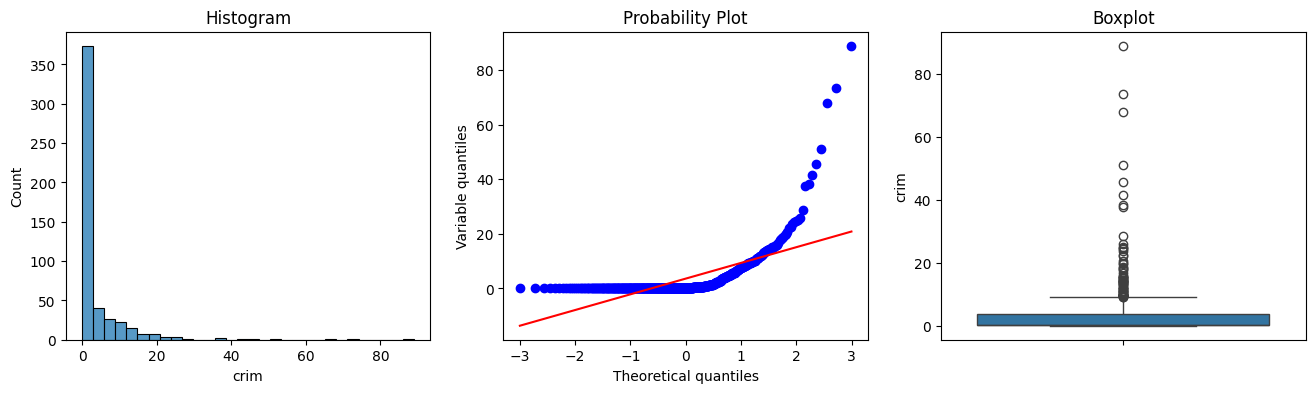

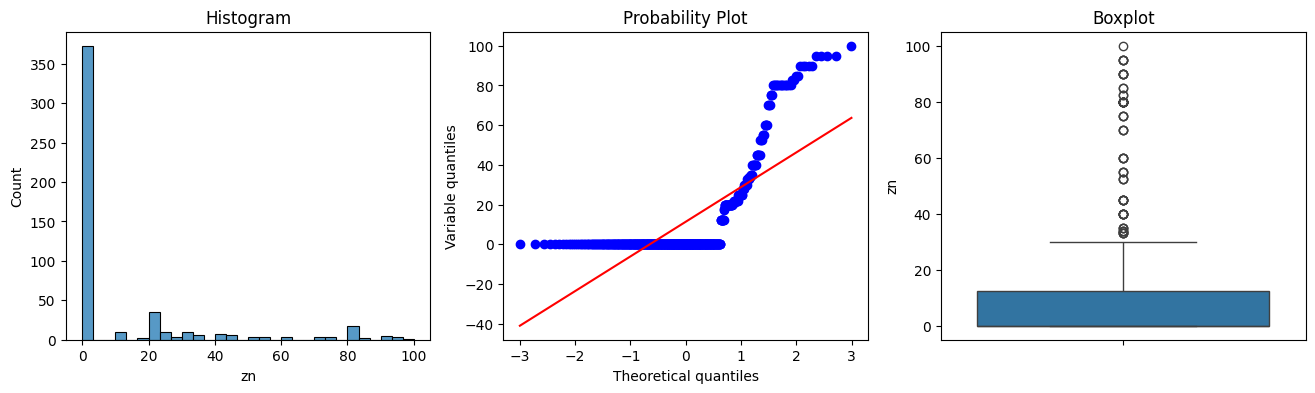

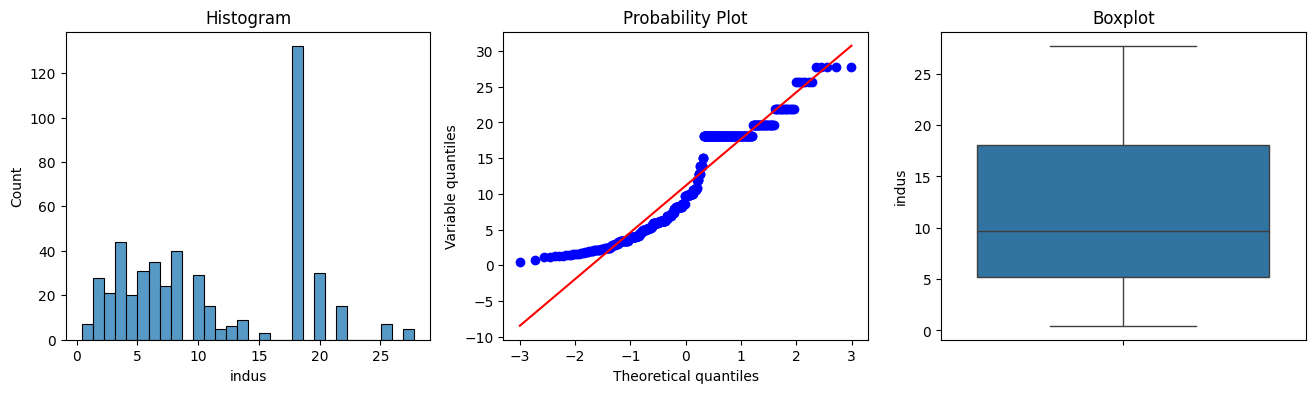

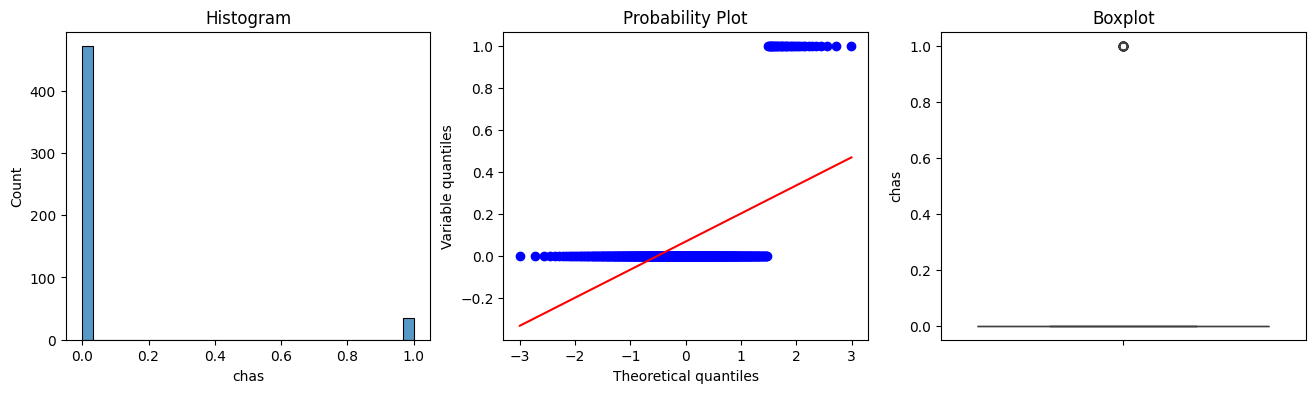

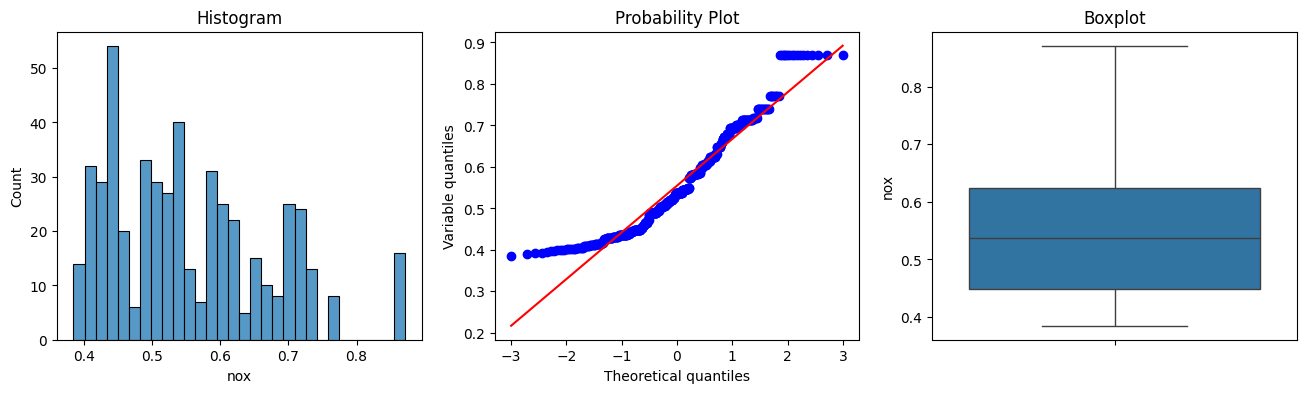

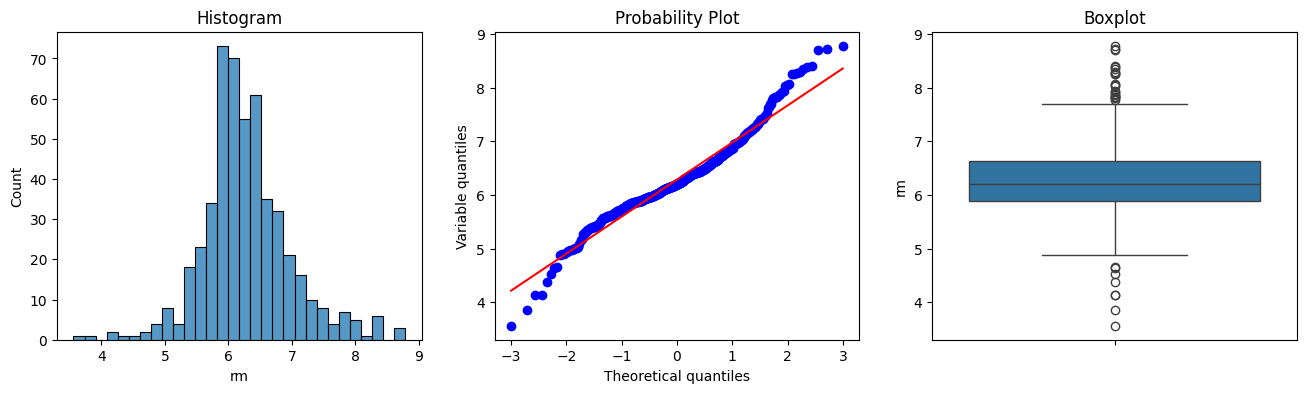

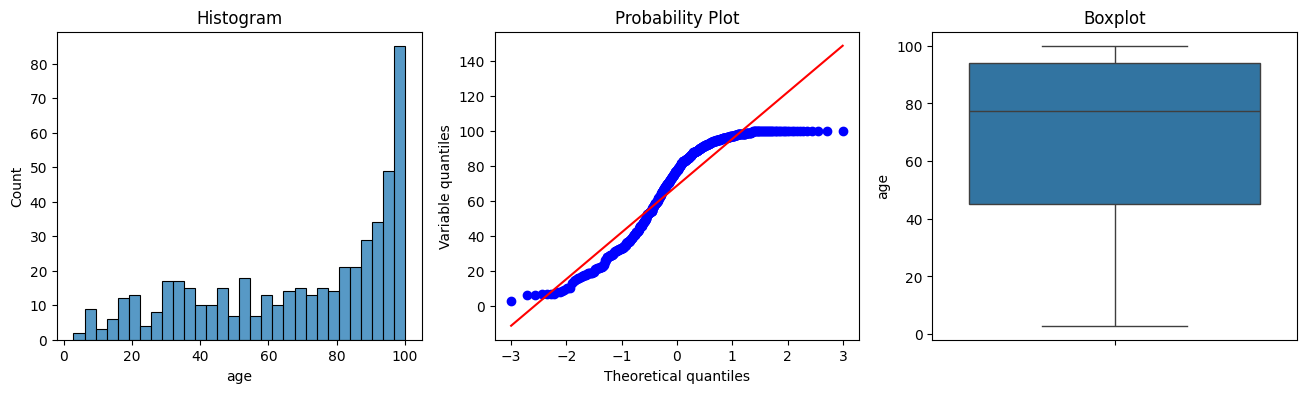

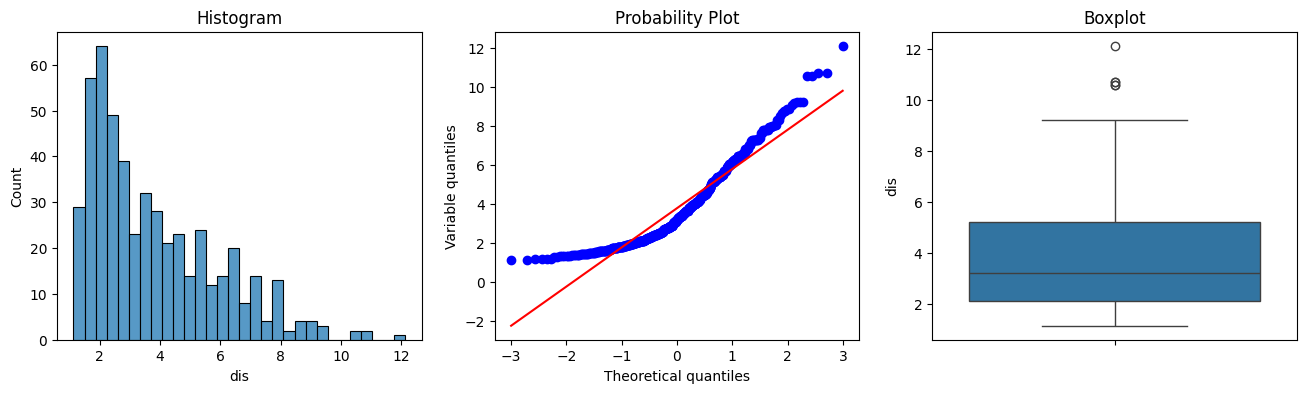

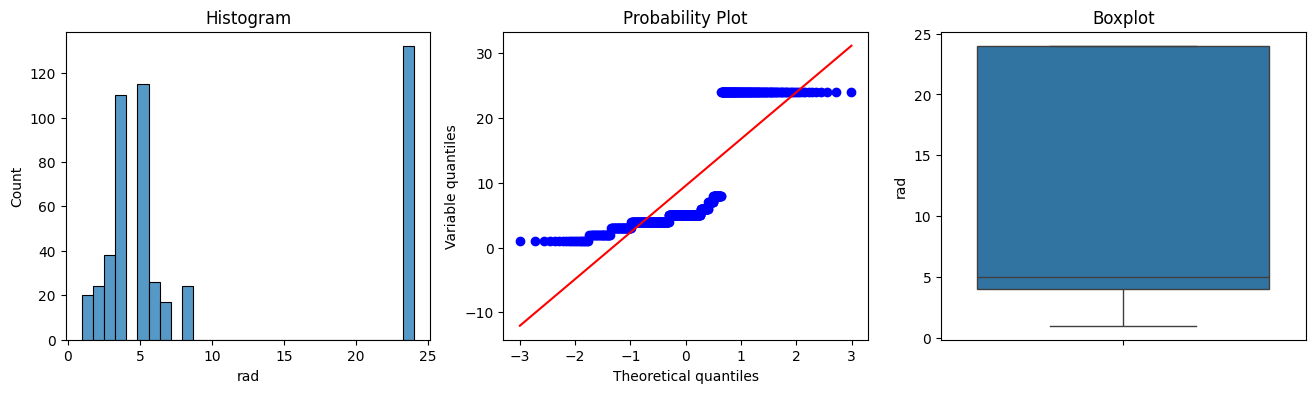

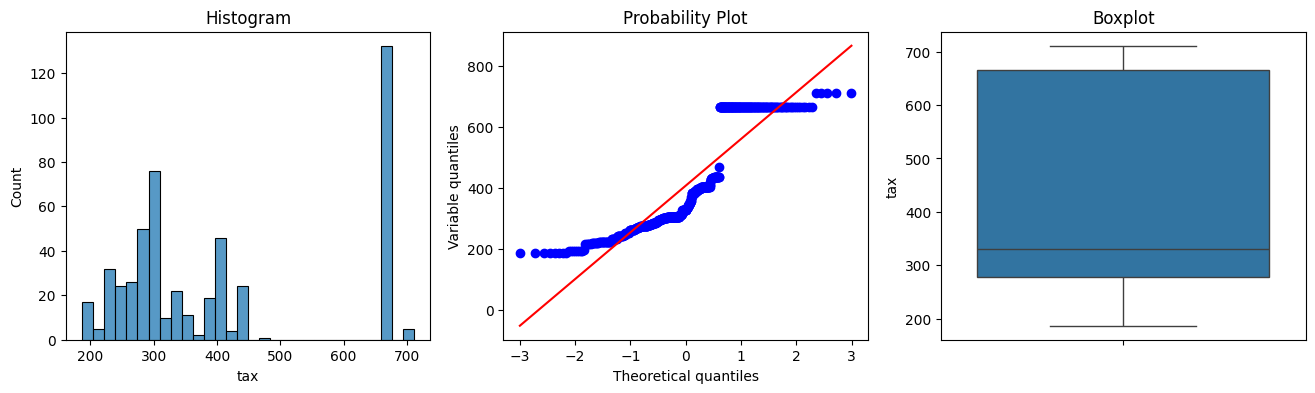

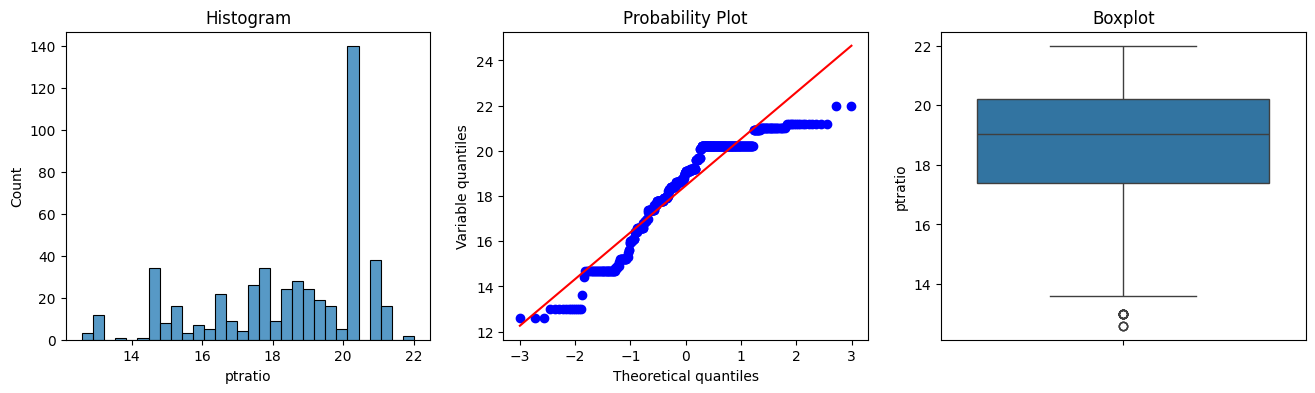

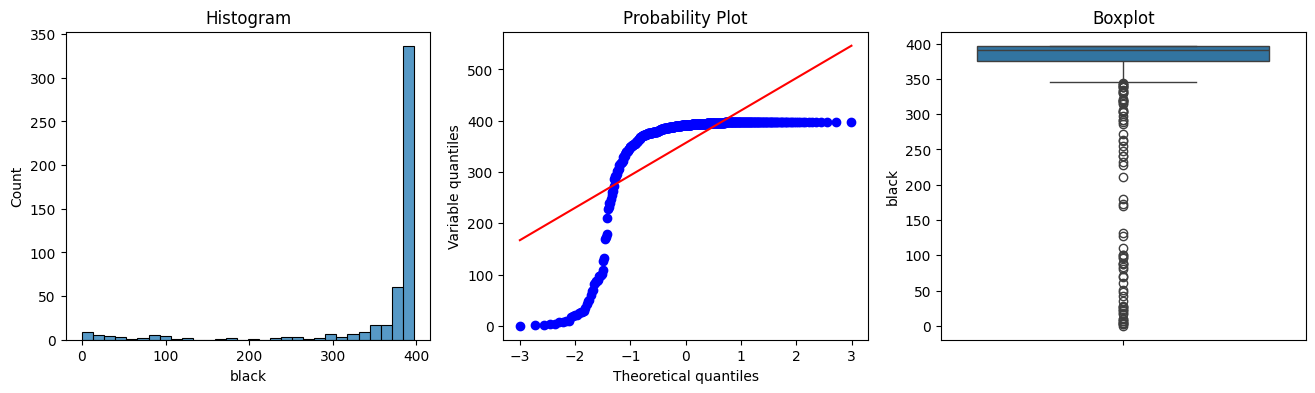

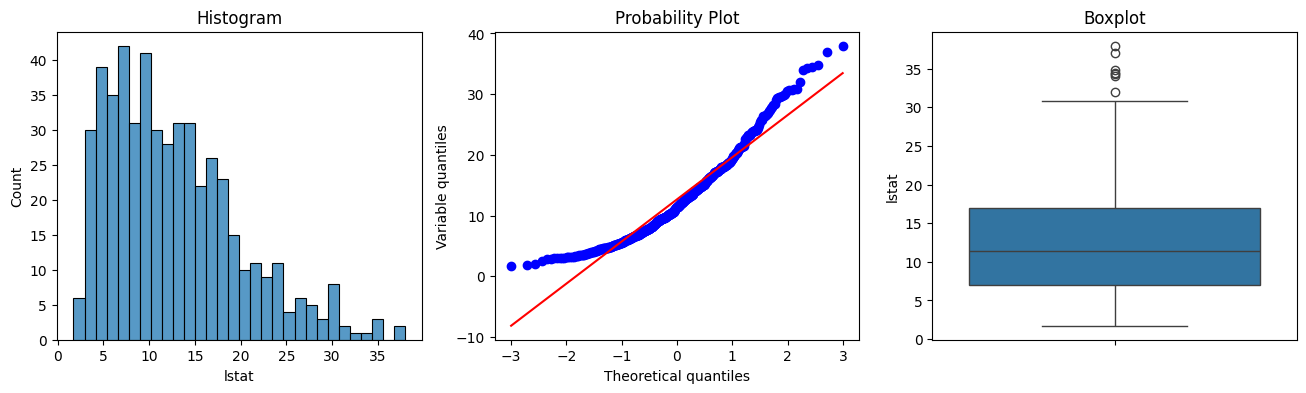

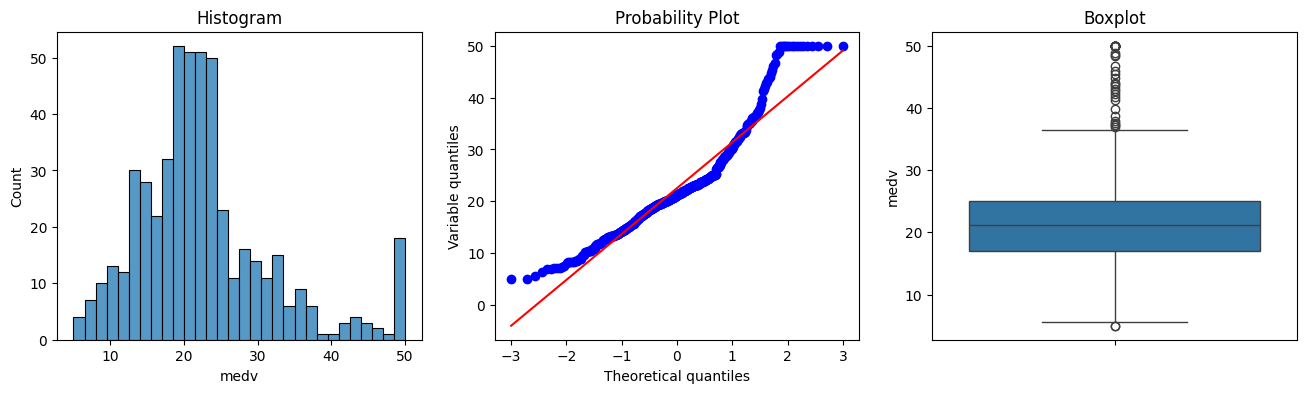

In [ ]:
# Memvisualisasikan outlier
for kolom in ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']:
    df = df_boston.copy()
    check_plot(df, kolom)

In [ ]:
# Menghitung IQR, batas atas/bawah, serta memeriksa outlier untuk setiap kolom
def calc_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    print(f"\n[{column}]")
    print(f"Q1: {q1:.2f}, Median: {df[column].median():.2f}, Q3: {q3:.2f}")
    print(f"Upper Fence: {upper_fence:.2f}, Lower Fence: {lower_fence:.2f}")
    print(f"Min: {df[column].min():.2f}, Max: {df[column].max():.2f}")

    outliers_upper = df[df[column] > upper_fence][column]
    outliers_lower = df[df[column] < lower_fence][column]

    print(f"Outliers di atas Upper Fence: {list(outliers_upper)}")
    print(f"Outliers di bawah Lower Fence: {list(outliers_lower)}")

# Daftar kolom yang akan dicek
columns_to_check = ['crim', 'zn', 'rm', 'dis', 'ptratio', 'black', 'lstat', 'medv']

# Iterasi untuk setiap kolom pada df_boston
for col in columns_to_check:
    calc_outliers(df_boston, col)


[crim]
Q1: 0.08, Median: 0.26, Q3: 3.68
Upper Fence: 9.07, Lower Fence: -5.31
Min: 0.01, Max: 88.98
Outliers di atas Upper Fence: [13.5222, 9.2323, 11.1081, 18.4982, 19.6091, 15.288, 9.82349, 23.6482, 17.8667, 88.9762, 15.8744, 9.18702, 20.0849, 16.8118, 24.3938, 22.5971, 14.3337, 11.5779, 13.3598, 38.3518, 9.91655, 25.0461, 14.2362, 9.59571, 24.8017, 41.5292, 67.9208, 20.7162, 11.9511, 14.4383, 51.1358, 14.0507, 18.811, 28.6558, 45.7461, 18.0846, 10.8342, 25.9406, 73.5341, 11.8123, 11.0874, 12.0482, 15.8603, 12.2472, 37.6619, 9.33889, 10.0623, 13.9134, 11.1604, 14.4208, 15.1772, 13.6781, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 9.51363, 15.5757, 13.0751, 15.0234, 10.233, 14.3337]
Outliers di bawah Lower Fence: []

[zn]
Q1: 0.00, Median: 0.00, Q3: 12.50
Upper Fence: 31.25, Lower Fence: -18.75
Min: 0.00, Max: 100.00
Outliers di atas Upper Fence: [75.0, 75.0, 75.0, 90.0, 85.0, 100.0, 80.0, 80.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 60.0, 60.0, 80.0, 80.0, 8

Outlier dihapus pada kolom `crim`, `zn`, `black`, dan `medv` karena nilai ekstrem pada kolom tersebut dapat mengganggu distribusi data dan mempengaruhi akurasi model, sementara fitur lainnya tidak terlalu menunjukkan pengaruh signifikan.

In [ ]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr

    df_clean = df[(df[column] >= lower_fence) & (df[column] <= upper_fence)]
    return df_clean

# Kolom yang akan dihapus outlier-nya
columns_to_remove_outliers = ['crim', 'zn', 'black', 'medv']

# Iterasi untuk menghapus outlier
for col in columns_to_remove_outliers:
    # Menghapus outlier pada df_boston
    df_boston = remove_outliers(df_boston, col)

# Periksa setelah penghapusan outlier
for col in columns_to_remove_outliers:
    calc_outliers(df_boston, col)


[crim]
Q1: 0.08, Median: 0.17, Q3: 0.60
Upper Fence: 1.38, Lower Fence: -0.70
Min: 0.01, Max: 8.98
Outliers di atas Upper Fence: [1.62864, 3.32105, 4.0974, 2.77974, 2.36862, 2.33099, 2.73397, 1.6566, 1.42502, 2.24236, 2.63548, 8.98296, 3.8497, 5.20177, 4.26131, 4.54192, 3.83684, 3.67822, 4.22239, 3.47428, 4.55587, 7.99248, 8.15174, 6.96215, 5.29305, 8.64476, 8.71675, 5.87205, 7.67202, 5.66637, 5.44114, 5.09017, 8.24809, 6.80117, 3.69311, 6.65492, 5.82115, 7.83932, 4.34879, 4.03841, 3.56868, 4.64689, 8.05579, 4.87141, 5.82401, 5.70818, 5.73116, 2.81838, 2.37857, 3.67367, 5.69175, 4.83567]
Outliers di bawah Lower Fence: []

[zn]
Q1: 0.00, Median: 0.00, Q3: 12.50
Upper Fence: 31.25, Lower Fence: -18.75
Min: 0.00, Max: 45.00
Outliers di atas Upper Fence: [45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 40.0, 40.0, 40.0, 40.0, 40.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 35.0, 35.0, 35.0, 40.0, 40.0]
Outliers di bawah Lower Fence: []

[black]
Q1: 387.40, Median: 393.42, Q3: 396.90
Upper Fence: 411.

In [ ]:
# Menampilkan data setelah penghapusan outlier
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.994133,6.663009,10.136959,0.075235,0.533852,6.232777,65.604702,3.999058,7.021944,357.780564,18.526959,389.395517,11.647712,22.369906
std,1.924822,12.362645,6.324341,0.264185,0.100765,0.524742,26.582713,1.772567,6.701836,139.310822,1.944277,10.440264,5.547692,5.475805
min,0.006320,0.000000,1.250000,0.000000,0.409000,3.561000,2.900000,1.321600,1.000000,188.000000,13.000000,350.450000,2.870000,8.500000
25%,0.082545,0.000000,5.415000,0.000000,0.449000,5.913500,44.700000,2.513650,4.000000,276.000000,17.400000,387.400000,7.415000,19.050000
50%,0.170040,0.000000,8.140000,0.000000,0.515000,6.167000,69.600000,3.671500,5.000000,307.000000,18.700000,393.420000,10.450000,21.700000
75%,0.602375,12.500000,13.920000,0.000000,0.581000,6.510500,90.150000,5.287300,6.000000,398.000000,20.200000,396.900000,14.645000,24.600000
max,8.982960,45.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,37.200000


Setelah penghapusan outlier pada kolom `crim`, `zn`, `black`, dan `medv`, dataset menunjukkan distribusi yang lebih terpusat dengan nilai rata-rata dan standar deviasi yang lebih wajar. Rentang nilai pada kolom-kolom ini menjadi lebih terkendali walaupun masih memiliki outlier tapi tidak seperti sebelumnya yang sangat ekstrim terutama pada kolom `crim`.

In [ ]:
# Memvisualisasikan kembali setelah dilakukan handling outlier
# for kolom in ['crim', 'zn', 'black', 'medv']:
#    df = df_boston.copy()
#    check_plot(df, kolom)
#Pada visualisasi boxplot setelah penghapusan outlier, Distribusi data pada kolom `crim`, `zn`, `black`, dan `medv` menjadi lebih terpusat. Rentang nilai ekstrim yang sebelumnya jauh di luar batas atas dan bawah kini lebih tereduksi, menunjukkan bahwa outlier telah berhasil dihapus dan distribusi data lebih sesuai untuk analisis lanjutan.

### `Model Preparation`



In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (variabel independen) dan target (variabel dependen)
X = df_boston.drop(columns=['medv'])  # Fitur (semua kolom kecuali 'medv')
y = df_boston[['medv']]  # Target ('medv')

In [ ]:
X.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [ ]:
y.head(2)

,medv
0,24.0
1,21.6


Memisahkan fitur (X) dan target (y) untuk dapat melatih model machine learning yang memprediksi harga rumah berdasarkan karakteristik seperti jumlah kamar, tingkat kriminalitas, dan lain sebagainya.

In [ ]:
# Membagi data menjadi training, validation, dan test set (80%, 16%, 4%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

`X_temp` hanya sebagai langkah sementara, tidak digunakan langsung, membantu memisahkan data validasi dan test. 80% data digunakan untuk training. Dari 20% sisa data, di bagi lagi menjadi: 16% untuk validasi (80% dari 20%), 4% untuk test (20% dari 20%).

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((255, 13), (51, 13), (13, 13))

### `Correlation and Feature Selection`

Menghitung intercept dalam regresi linier. Dalam model regresi, intercept berfungsi sebagai titik potong garis regresi pada sumbu y ketika semua variabel independen bernilai 0.

Rumus Model Regresi Linier:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

Di mana:<br>

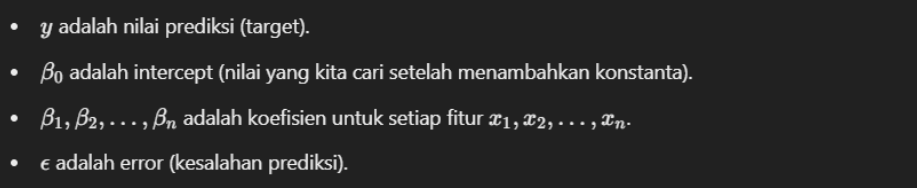

Menambahkan konstanta (kolom berisi nilai 1) memungkinkan model untuk "menyesuaikan" titik awal prediksi. Ini meningkatkan kemampuan model untuk mencocokkan data dengan lebih baik.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [ ]:
# Tambahkan konstanta
X_train_vif = add_constant(X_train)
X_train_vif

,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
281,1.0,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216,14.9,392.23,4.59
89,1.0,0.05302,0.0,3.41,0,0.4890,7.079,63.1,3.4145,2,270,17.8,396.06,5.70
110,1.0,0.10793,0.0,8.56,0,0.5200,6.195,54.4,2.7778,5,384,20.9,393.49,13.00
307,1.0,0.04932,33.0,2.18,0,0.4720,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
498,1.0,0.23912,0.0,9.69,0,0.5850,6.019,65.3,2.4091,6,391,19.2,396.90,12.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,1.0,0.19073,22.0,5.86,0,0.4310,6.718,17.5,7.8265,7,330,19.1,393.74,6.56
84,1.0,0.05059,0.0,4.49,0,0.4490,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
124,1.0,0.09849,0.0,25.65,0,0.5810,5.879,95.8,2.0063,2,188,19.1,379.38,17.58
364,1.0,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29


In [ ]:
# Hitung VIF untuk setiap fitur
vif_df = pd.DataFrame([vif(X_train_vif.values, i) for i in range(X_train_vif.shape[1])],
                      index=X_train_vif.columns).reset_index()
vif_df

,index,0
0,const,2227.145121
1,crim,6.683649
2,zn,1.694969
3,indus,2.785770
4,chas,1.092263
5,nox,4.115727
6,rm,1.817954
7,age,2.754881
8,dis,2.893245
9,rad,8.601679


In [ ]:
vif_df.columns = ['feature', 'vif_score']
vif_df.head()

,feature,vif_score
0,const,2227.145121
1,crim,6.683649
2,zn,1.694969
3,indus,2.785770
4,chas,1.092263


In [ ]:
 # Hilangkan konstanta dari VIF
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,crim,6.683649
2,zn,1.694969
3,indus,2.785770
4,chas,1.092263
5,nox,4.115727
6,rm,1.817954
7,age,2.754881
8,dis,2.893245
9,rad,8.601679
10,tax,5.244183


Berdasarkan hasil VIF Score, tidak ada fitur dengan multikolinearitas yang signifikan (VIF > 10). Beberapa fitur seperti `crim`, `rad` dan `tax` memiliki VIF mendekati 10.

In [ ]:
# Gabungkan X_train dengan y_train untuk melihat korelasi
medv_train = pd.concat([X_train, y_train], axis=1)
corr = medv_train.corr()

In [ ]:
# Plot heatmap dengan desain sesuai preferensi
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale='viridis',
    title="Correlation Heatmap of Training Data"
)
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    title_font=dict(size=24, family='Arial', color='white'),
    autosize=True,
    width=1300, height=800,
    xaxis=dict(tickangle=45),
    margin=dict(l=50, r=50, t=50, b=50)
)
fig.show()

`Observasi`<br>
Berdasarkan hasil korelasi, beberapa fitur menunjukkan hubungan yang cukup signifikan dengan target `medv` (harga rumah):

**Fitur dengan korelasi positif yang kuat**

- rm (jumlah kamar) memiliki korelasi positif yang kuat sebesar 0.63 dengan harga rumah, menunjukkan bahwa semakin banyak kamar, semakin tinggi harga rumah.
- zn (zona yang lebih tinggi) dis (Jarak tertimbang) dan black (rasio penduduk kulit hitam) juga menunjukkan korelasi positif, tetapi tidak setinggi rm.

**Fitur dengan korelasi negatif yang kuat**

- lstat (persentase rumah dengan status sosial ekonomi rendah) memiliki korelasi negatif kuat (-0.67), yang berarti semakin tinggi persentase rumah dengan status sosial ekonomi rendah, semakin rendah harga rumah.
- indus, tax, ptratio, crim, dan nox juga menunjukkan korelasi negatif dengan harga rumah, yang berarti faktor-faktor seperti tingkat kejahatan, rasio pajak properti, dan tingkat polusi udara dapat menurunkan harga rumah.

Secara keseluruhan, fitur `rm` dan `lstat` memiliki pengaruh paling besar terhadap harga rumah, dengan `rm` meningkatkan harga dan `lstat` menurunkannya.

- `rad` (VIF: 8.601, korelasi: -0.18), `tax` (VIF 5.244, korelasi -0.33), `crim` (VIF: 6.683, Korelasi: -0.30)<br>
VIF tinggi dan Korelasi negatif moderat pada ketiga fitur menandakan multikolinearitas signifikan yang dapat menurunkan performa model regresi.

In [ ]:
# drop redundant features
X_train = X_train.drop(columns=['rad', 'tax', 'crim'])
X_test = X_test.drop(columns=['rad', 'tax', 'crim'])
X_valid = X_valid.drop(columns=['rad', 'tax', 'crim'])

In [ ]:
X_train.head(2)

,zn,indus,chas,nox,rm,age,dis,ptratio,black,lstat
281,20.0,3.33,0,0.4429,6.968,37.2,5.2447,14.9,392.23,4.59
89,0.0,3.41,0,0.4890,7.079,63.1,3.4145,17.8,396.06,5.70


In [ ]:
# Cek kembali apakah fitur yang sudah di drop masih ada
X_train_vif = add_constant(X_train)
vif_df = pd.DataFrame([
    vif(X_train_vif.values, i) for i in range(X_train_vif.shape[1])
], index=X_train_vif.columns).reset_index()
vif_df.columns = ['feature', 'vif_score']
vif_df = vif_df.loc[vif_df.feature != 'const']
vif_df

,feature,vif_score
1,zn,1.671158
2,indus,2.397097
3,chas,1.061081
4,nox,3.140992
5,rm,1.777908
6,age,2.730759
7,dis,2.840919
8,ptratio,1.365497
9,black,1.148951
10,lstat,2.719011


## `MODEL TRAINING`

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# convert to numpy (array)
X_medv_train = X_train.to_numpy() # data fitur
y_medv_train = y_train.to_numpy().reshape(len(y_train),)# data target

# validasi
X_valid = X_valid.to_numpy()
y_valid = y_valid.to_numpy().reshape(len(y_valid),)

In [ ]:
# Tentukan lambdas (alpha) yang ingin diuji
lambdas = [0.01, 0.1, 1, 10]

In [ ]:
# Menyimpan hasil RMSE untuk setiap model dan nilai lambdas
ridge_rmse_values = []
lasso_rmse_values = []

In [ ]:
# model Ridge
for alpha in lambdas:
# Definisikan dan latih model Ridge
    ridge_reg = Ridge(alpha=alpha, random_state=42)
    ridge_reg.fit(X_medv_train, y_medv_train)
# Prediksi dengan data validasi
    y_ridge_pred = ridge_reg.predict(X_valid)
# Hitung RMSE
    ridge_rmse = np.sqrt(mean_squared_error(y_valid, y_ridge_pred))
    ridge_rmse_values.append(ridge_rmse)

`RMSE` (Root Mean Squared Error) adalah metrik evaluasi dalam machine learning dan statistik yang digunakan untuk mengukur seberapa baik model memprediksi nilai target dibandingkan dengan nilai aktualnya (medv). Pada kasus ini menggunakan model `Ridge` Regression dan `Lasso` Regression.

In [ ]:
# RMSE untuk setiap alpha model Ridge
for alpha, rmse in zip(lambdas, ridge_rmse_values):
    print(f"alpha={alpha}: RMSE={rmse}")

alpha=0.01: RMSE=2.7602170101683914
alpha=0.1: RMSE=2.761232426983952
alpha=1: RMSE=2.778641638418933
alpha=10: RMSE=2.876483298403736


`Observasi`<br>
Ridge Regression dengan alpha 0.01 menghasilkan RMSE = 2.760, menunjukkan performa prediksi terbaik. Peningkatan nilai alpha sedikit meningkatkan RMSE, menandakan pengaruh regularisasi yang lebih kuat.

In [ ]:
# Definisikan dan latih model Ridge dengan alpha terbaik
ridge_reg = Ridge(alpha=0.01, random_state=42)
ridge_reg.fit(X_medv_train, y_medv_train)

Ridge(alpha=0.01, random_state=42)

In [ ]:
#  show as a nice dataframe
data = X_train
model = ridge_reg
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})
coef_df

,feature,coefficient
0,intercept,28.949551
1,zn,0.047216
2,indus,-0.091547
3,chas,1.742231
4,nox,-6.518298
5,rm,3.161936
6,age,-0.030939
7,dis,-0.964610
8,ptratio,-0.695392
9,black,0.000993


Pada `model Ridge`, koefisien semakin besar nilai absolutnya, semakin besar pengaruh fitur tersebut terhadap prediksi (baik positif maupun negatif).

Koefisien paling berpengaruh adalah `rm` (3.161) yang berdampak positif, menunjukkan bahwa semakin banyak jumlah kamar rata-rata per rumah, semakin tinggi prediksi target.<br>
Sebaliknya, `nox` (-6.518) berdampak negatif, artinya peningkatan polusi udara cenderung menurunkan prediksi target.

In [ ]:
# model lasso
for alpha in lambdas:
# Definisikan dan latih model lasso
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_reg.fit(X_medv_train, y_medv_train)
# Prediksi dengan data validasi
    y_lasso_pred = lasso_reg.predict(X_valid)
# Hitung RMSE
    lasso_rmse = np.sqrt(mean_squared_error(y_valid, y_lasso_pred))
    lasso_rmse_values.append(lasso_rmse)

In [ ]:
# RMSE untuk setiap alpha model lasso
for alpha, rmse in zip(lambdas, lasso_rmse_values):
    print(f"alpha={alpha}: RMSE={rmse}")

alpha=0.01: RMSE=2.7734408244287607
alpha=0.1: RMSE=2.88404672236698
alpha=1: RMSE=3.6249883981444526
alpha=10: RMSE=4.976450677404172


`Observasi`<br>
Lasso Regression dengan alpha 0.01 menghasilkan RMSE = 2.773, menunjukkan model yang lebih sederhana dan prediksi yang lebih baik. Peningkatan alpha meningkatkan RMSE, yang menandakan over-regularization pada nilai alpha yang lebih tinggi.

In [ ]:
# Definisikan dan latih model Lasso dengan alpha terbaik
lasso_reg = Lasso(alpha=0.01, random_state=42)

# Melatih model dengan data pelatihan
lasso_reg.fit(X_medv_train, y_medv_train)

Lasso(alpha=0.01, random_state=42)

In [ ]:
#  show as a nice dataframe
data = X_train
model = lasso_reg
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})
coef_df

,feature,coefficient
0,intercept,25.540505
1,zn,0.049073
2,indus,-0.107568
3,chas,1.574658
4,nox,-3.424896
5,rm,3.112261
6,age,-0.033229
7,dis,-0.899281
8,ptratio,-0.677548
9,black,0.005644


Koefisien yang bernilai 0 pada `Model Lasso` menunjukkan bahwa model mengabaikan fitur tersebut, yang berarti fitur tersebut tidak berkontribusi sama sekali dalam memprediksi target variabel.

Koefisien yang paling berpengaruh adalah yang memiliki nilai absolut terbesar baik positif maupun negatif:

- `nox` (-3.424): Memiliki pengaruh negatif yang besar, artinya semakin tinggi konsentrasi polusi udara (nox), semakin rendah harga rumah.
- `rm` (3.112): Memiliki pengaruh positif terbesar artinya semakin banyak kamar per rumah, semakin tinggi prediksi harga rumah.


## `TRAINING INTERPRETATION`

Berdasarkan hasil pelatihan model, koefisien pada model Ridge dan Lasso menunjukkan seberapa besar pengaruh masing-masing fitur terhadap prediksi target. Koefisien yang besar menunjukkan bahwa fitur tersebut berkontribusi signifikan terhadap prediksi, sedangkan koefisien yang kecil (atau nol pada Lasso) mengindikasikan fitur yang kurang berpengaruh atau diabaikan dalam model.

Berikut adalah perbandingan antara model Ridge dan model Lasso dengan nilai alpha terbaik yang dipilih.

**Perbandingan Model Ridge vs Lasso**

| Model | Alpha Terbaik | RMSE Terbaik | Fitur Paling Berpengaruh (Koefisien) |
|-----------|------------------|------------------|-------------------------------------------|
| Ridge     | 0.01             | 2.760            | `rm (3.161)`, `nox (-6.518)`            |
| Lasso     | 0.01             | 2.773            | `rm (3.112)`, `nox (-3.424)`          |

**Model Pilihan**<br>
`Model Ridge` dipilih sebagai model yang lebih baik dalam skenario pelatihan ini karena menghasilkan RMSE yang lebih rendah (2.760) dibandingkan Lasso (2.773). Ridge mempertahankan semua fitur dalam model tanpa menekan koefisien menjadi nol. Selain itu, nilai koefisien yang lebih besar pada fitur nox dan rm menunjukkan pengaruh yang lebih signifikan terhadap prediksi target.

## `MODEL EVALUATION`

Pada tahap evaluasi model, digunakan data pengujian (`X_test` dan `y_test`) yang tidak pernah dilibatkan dalam proses pelatihan dan validasi. Evaluasi ini bertujuan untuk menilai performa akhir model dalam memprediksi data baru yang benar-benar tidak terlihat sebelumnya, sehingga memberikan gambaran akurat tentang kemampuan generalisasi model.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# 1. Fitur dan target
X = df_boston.drop(columns=['medv'])
y = df_boston[['medv']]

In [ ]:
# 2. Data training, validation, dan test set (80%, 16%, 4%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_valid.shape, X_test.shape

((255, 13), (51, 13), (13, 13))

In [ ]:
# 3. Drop redundant features
X_train = X_train.drop(columns=['rad', 'tax', 'crim'])
X_test = X_test.drop(columns=['rad', 'tax', 'crim'])
X_valid = X_valid.drop(columns=['rad', 'tax', 'crim'])

In [ ]:
# 4. Convert to numpy
# training
X_medv_train =  X_train.to_numpy()
y_medv_train = y_train.to_numpy().reshape(len(y_train),)

# validasi
X_valid = X_valid.to_numpy()
y_valid = y_valid.to_numpy().reshape(len(y_valid),)

# pengujian (x_test)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().reshape(len(y_test),)

In [ ]:
# 5. Tuning alpha
alphas = [0.01, 0.1, 1, 10]

# 6. Menyimpan hasil RMSE
ridge_rmse = []
lasso_rmse = []

In [ ]:
# model Ridge
for alpha in alphas:
    # Latih model Ridge
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_medv_train, y_medv_train)

    # Prediksi pada data validasi
    y_pred_valid_ridge = ridge.predict(X_valid)

    # Hitung RMSE pada data validasi
    rmse_ridge = np.sqrt(mean_squared_error(y_valid, y_pred_valid_ridge))
    ridge_rmse.append(rmse_ridge)

In [ ]:
# Tampilkan RMSE untuk setiap alpha model Ridge
for alpha, rmse in zip(alphas, ridge_rmse):
    print(f"alpha={alpha}: RMSE={rmse}")

alpha=0.01: RMSE=2.7602170101683914
alpha=0.1: RMSE=2.761232426983952
alpha=1: RMSE=2.778641638418933
alpha=10: RMSE=2.876483298403736


In [ ]:
# Pilih alpha terbaik untuk ridge
ridge = Ridge(alpha=0.01, random_state=42)
ridge.fit(X_medv_train, y_medv_train)

Ridge(alpha=0.01, random_state=42)

In [ ]:
# model Lasso
for alpha in alphas:
    # Latih model Lasso
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_medv_train, y_medv_train)

    # Prediksi pada data validasi
    y_pred_valid_lasso = lasso.predict(X_valid)

    # Hitung RMSE pada data validasi
    rmse_lasso = np.sqrt(mean_squared_error(y_valid, y_pred_valid_lasso))
    lasso_rmse.append(rmse_lasso)

In [ ]:
# Tampilkan RMSE untuk setiap alpha model Ridge
for alpha, rmse in zip(alphas, lasso_rmse):
    print(f"alpha={alpha}: RMSE={rmse}")

alpha=0.01: RMSE=2.7734408244287607
alpha=0.1: RMSE=2.88404672236698
alpha=1: RMSE=3.6249883981444526
alpha=10: RMSE=4.976450677404172


In [ ]:
# Pilih alpha terbaik untuk Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_medv_train, y_medv_train)

Lasso(alpha=0.01, random_state=42)

In [ ]:
# 7. Evaluasi akhir pada data test (X_test, y_test)
# Ridge dengan alpha terbaik
y_pred_test_ridge = ridge.predict(X_test)
# lasso dengan alpha terbaik
y_pred_test_lasso = lasso.predict(X_test)

In [ ]:
# Hitung metrik evaluasi untuk Ridge
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mape_test_ridge = mean_absolute_percentage_error(y_test, y_pred_test_ridge)

In [ ]:
# Hitung metrik evaluasi untuk Lasso
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mape_test_lasso = mean_absolute_percentage_error(y_test, y_pred_test_lasso)

**Evaluasi Kualitas Model Regresi**<br>
Model yang baik memiliki nilai RMSE, MAE, dan MAPE yang rendah, menunjukkan kesalahan prediksi yang kecil. `RMSE` mengukur kesalahan rata-rata kuadrat, `MAE` mengukur selisih absolut rata-rata, dan `MAPE` menunjukkan persentase kesalahan. Semakin rendah ketiga metrik ini, semakin akurat prediksi model. Model dengan nilai metrik yang tinggi menunjukkan ketidak akuratan prediksi yang lebih besar.

In [ ]:
# Tampilkan hasil evaluasi model Ridge
print("Ridge Regression:")
print(f"RMSE on test data: {rmse_test_ridge}")
print(f"MAE on test data: {mae_test_ridge}")
print(f"MAPE on test data: {mape_test_ridge}")

Ridge Regression:
RMSE on test data: 2.7164380355830042
MAE on test data: 1.9174528985365187
MAPE on test data: 0.08363745432993011


`Model Ridge` Regression menghasilkan RMSE 2.71, MAE 1.91, dan MAPE 8.36%. Ini menunjukkan kesalahan prediksi yang cukup kecil, dengan persentase kesalahan sekitar 8.36%. Meskipun tidak sangat rendah, model ini tetap dapat memprediksi dengan akurat. Secara keseluruhan, model ini cukup akurat dalam memprediksi data uji.

In [ ]:
# Tampilkan hasil evaluasi model Lasso
print("\nLasso Regression:")
print(f"RMSE on test data: {rmse_test_lasso}")
print(f"MAE on test data: {mae_test_lasso}")
print(f"MAPE on test data: {mape_test_lasso}")


Lasso Regression:
RMSE on test data: 2.682218206603424
MAE on test data: 1.8714091821800947
MAPE on test data: 0.08204246347987176


`Model Lasso` Regression menghasilkan RMSE sebesar 2.68, MAE 1.87, dan MAPE 8.20%. Nilai RMSE yang rendah menunjukkan kesalahan prediksi yang kecil. MAE yang sebesar 1.87 juga menandakan bahwa perbedaan rata-rata antara prediksi dan nilai aktual tidak terlalu besar. Secara keseluruhan, model menunjukkan kinerja yang baik pada data uji.

In [ ]:
# 8. Tampilkan koefisien model
# Ridge
coef_ridge = pd.DataFrame({
    'feature': ['intercept'] + X_train.columns.tolist(),
    'coefficient': [ridge.intercept_] + list(ridge.coef_)
})
coef_ridge

,feature,coefficient
0,intercept,28.949551
1,zn,0.047216
2,indus,-0.091547
3,chas,1.742231
4,nox,-6.518298
5,rm,3.161936
6,age,-0.030939
7,dis,-0.964610
8,ptratio,-0.695392
9,black,0.000993


Pada `model Ridge`, koefisien rm sebesar 3.161 menunjukkan hubungan positif yang kuat antara rm dan target. Sebaliknya, koefisien nox sebesar -6.518 menunjukkan pengaruh negatif terhadap prediksi target. Artinya, semakin tinggi nilai rm, semakin tinggi prediksi target, dan semakin tinggi nilai nox, semakin rendah prediksi target.

In [ ]:
# Lasso
coef_lasso = pd.DataFrame({
    'feature': ['intercept'] + X_train.columns.tolist(),
    'coefficient': [lasso.intercept_] + list(lasso.coef_)
})
coef_lasso

,feature,coefficient
0,intercept,25.540505
1,zn,0.049073
2,indus,-0.107568
3,chas,1.574658
4,nox,-3.424896
5,rm,3.112261
6,age,-0.033229
7,dis,-0.899281
8,ptratio,-0.677548
9,black,0.005644


Untuk `model Lasso`, koefisien rm sebesar 3.112 menunjukkan hubungan positif yang berarti semakin banyak kamar, semakin tinggi prediksi harga rumah. Koefisien nox sebesar -3.424 menunjukkan pengaruh negatif, artinya semakin tinggi polusi udara, semakin rendah prediksi harga rumah.

In [ ]:
df_boston[['medv']].describe()

,medv
count,319.000000
mean,22.369906
std,5.475805
min,8.500000
25%,19.050000
50%,21.700000
75%,24.600000
max,37.200000


## `EVALUATION INTERPRETATION`

Berdasarkan hasil evaluasi model, berikut kesimpulan yang dapat diambil:

| **Model** | **Alpha Terbaik** | **RMSE** | **MAE** | **MAPE** | **Fitur Paling Berpengaruh (Koefisien)** |
|-----------|------------------|----------|---------|----------|-------------------------------------------|
| Ridge     | 0.01 (2.760)             | 2.716    | 1.91    | 8.36%    | rm (3.161), nox (-6.518)            |
| Lasso     | 0.01 (2.773)            | 2.682    | 1.87    | 8.20%    | rm (3.112), nox (-3.424)          |


`Model Ridge` (α = 0.01) menghasilkan RMSE 2.716 yang menunjukkan kontrol terhadap kesalahan kuadrat rata-rata. MAE sebesar 1.91 mencerminkan selisih prediksi yang cukup kecil, sementara MAPE 8.36% menunjukkan tingkat kesalahan prediksi yang cukup rendah. Fitur paling berpengaruh adalah rm dengan koefisien positif 3.161 dan nox dengan koefisien negatif -6.518.

`Model Lasso` (α = 0.01) menghasilkan RMSE 2.682 yang menunjukkan kontrol kesalahan yang baik. MAE sebesar 1.87 mencerminkan kesalahan prediksi yang cukup rendah, sedangkan MAPE 8.20% menunjukkan akurasi prediksi yang cukup baik. Fitur paling berpengaruh adalah rm dengan koefisien positif 3.112 dan nox dengan koefisien negatif -3.424.

- Nilai RMSE > MAE, menunjukkan ada kemungkinan outlier dalam prediksi.
- MAE sekitar 1.87 (Lasso) dan 1.91 (Ridge) menunjukkan rata-rata kesalahan prediksi sekitar 1.87k hingga 1.91k dari harga rata-rata rumah sebesar 22.36k.

Dengan demikian, ketika memprediksi harga rumah, model memiliki error sekitar ±1.87k hingga ±1.91k.

`Kinerja Model`:

- Lasso memiliki error yang lebih rendah dibandingkan Ridge, namun perbedaannya kecil sekitar 40.
- Model cukup baik dalam memprediksi harga rumah dengan error yang relatif rendah dari rata-rata harga rumah sekitar 22.3k.

Meskipun Ridge memberikan performa pelatihan yang lebih baik, **evaluasi menunjukkan bahwa Lasso lebih unggul dalam prediksi**, menjadikannya pilihan yang sedikit lebih akurat untuk implementasi model ini.

In [ ]:
# Buat DataFrame hasil prediksi
df_eval = pd.DataFrame({
    'medv_actual': y_test,
    'medv_pred_ridge': y_pred_test_ridge,
    'medv_pred_lasso': y_pred_test_lasso
})
df_eval.head()

,medv_actual,medv_pred_ridge,medv_pred_lasso
0,26.7,28.212721,27.853053
1,16.6,16.389704,16.416893
2,22.5,22.022321,21.958443
3,23.4,24.073522,24.194850
4,19.3,21.188860,21.163638


In [ ]:
df_eval['error_ridge'] = abs(df_eval['medv_actual'] - df_eval['medv_pred_ridge'])
df_eval['error_lasso'] = abs(df_eval['medv_actual'] - df_eval['medv_pred_lasso'])
df_eval.head()

,medv_actual,medv_pred_ridge,medv_pred_lasso,error_ridge,error_lasso
0,26.7,28.212721,27.853053,1.512721,1.153053
1,16.6,16.389704,16.416893,0.210296,0.183107
2,22.5,22.022321,21.958443,0.477679,0.541557
3,23.4,24.073522,24.194850,0.673522,0.794850
4,19.3,21.188860,21.163638,1.888860,1.863638


In [ ]:
# Membuat DataFrame untuk data aktual dan prediksi
df_plot = pd.DataFrame({
    'Index': list(range(len(y_test))),
    'Actual MEDV': y_test.flatten(),
    'Ridge Prediction': y_pred_test_ridge.flatten(),
    'Lasso Prediction': y_pred_test_lasso.flatten()
})
fig = px.scatter(df_plot, x='Index', y=['Actual MEDV', 'Ridge Prediction', 'Lasso Prediction'],
                 labels={'Index': 'Data Index', 'value': 'MEDV Value'},
                 title='Actual vs Predicted MEDV (Ridge & Lasso)',
                 color_discrete_map={'Actual MEDV': 'blue', 'Ridge Prediction': 'red', 'Lasso Prediction': 'green'})
# Daftar simbol dan kolom untuk dipetakan
symbols = ['circle', 'x', 'triangle-up']
columns = ['Actual MEDV', 'Ridge Prediction', 'Lasso Prediction']

# Mengupdate traces secara dinamis
for symbol, column in zip(symbols, columns):
    fig.update_traces(
        selector=dict(name=column),
        marker=dict(symbol=symbol, size=10)
    )
fig.update_yaxes(range=[-10, 50])
fig.update_traces(marker=dict(size=11))
fig.show()

## `IMPLEMENTASI MODEL`

In [ ]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.994133,6.663009,10.136959,0.075235,0.533852,6.232777,65.604702,3.999058,7.021944,357.780564,18.526959,389.395517,11.647712,22.369906
std,1.924822,12.362645,6.324341,0.264185,0.100765,0.524742,26.582713,1.772567,6.701836,139.310822,1.944277,10.440264,5.547692,5.475805
min,0.006320,0.000000,1.250000,0.000000,0.409000,3.561000,2.900000,1.321600,1.000000,188.000000,13.000000,350.450000,2.870000,8.500000
25%,0.082545,0.000000,5.415000,0.000000,0.449000,5.913500,44.700000,2.513650,4.000000,276.000000,17.400000,387.400000,7.415000,19.050000
50%,0.170040,0.000000,8.140000,0.000000,0.515000,6.167000,69.600000,3.671500,5.000000,307.000000,18.700000,393.420000,10.450000,21.700000
75%,0.602375,12.500000,13.920000,0.000000,0.581000,6.510500,90.150000,5.287300,6.000000,398.000000,20.200000,396.900000,14.645000,24.600000
max,8.982960,45.000000,27.740000,1.000000,0.871000,8.780000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,37.200000


In [ ]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X_full = df_boston.drop(columns=['medv', 'rad', 'tax', 'crim'])

In [ ]:
X_full_numpy = X_full.to_numpy()

In [ ]:
y_pred_ridge_full = ridge.predict(X_full_numpy)
y_pred_lasso_full = lasso.predict(X_full_numpy)

In [ ]:
df_eval_full = pd.DataFrame({
    'medv_actual': df_boston['medv'],  # Target asli
    'medv_pred_ridge': y_pred_ridge_full,
    'medv_pred_lasso': y_pred_lasso_full
})
df_eval_full

,medv_actual,medv_pred_ridge,medv_pred_lasso
0,24.0,28.931576,29.081406
1,21.6,23.154015,23.048975
2,34.7,27.893016,27.784066
3,33.4,26.993017,27.071290
4,36.2,26.375574,26.432056
...,...,...,...
501,22.4,22.864279,22.887428
502,20.6,21.527890,21.568885
503,23.9,25.103837,25.069927
504,22.0,24.071923,24.047363


In [ ]:
# Hitung error prediksi
df_eval_full['error_ridge'] = abs(df_eval_full['medv_actual'] - df_eval_full['medv_pred_ridge'])
df_eval_full['error_lasso'] = abs(df_eval_full['medv_actual'] - df_eval_full['medv_pred_lasso'])
df_eval_full

,medv_actual,medv_pred_ridge,medv_pred_lasso,error_ridge,error_lasso
0,24.0,28.931576,29.081406,4.931576,5.081406
1,21.6,23.154015,23.048975,1.554015,1.448975
2,34.7,27.893016,27.784066,6.806984,6.915934
3,33.4,26.993017,27.071290,6.406983,6.328710
4,36.2,26.375574,26.432056,9.824426,9.767944
...,...,...,...,...,...
501,22.4,22.864279,22.887428,0.464279,0.487428
502,20.6,21.527890,21.568885,0.927890,0.968885
503,23.9,25.103837,25.069927,1.203837,1.169927
504,22.0,24.071923,24.047363,2.071923,2.047363


In [ ]:
# Prediksi dengan dataset penuh
df_plot_full = pd.DataFrame({
    'Index': list(range(len(df_boston))),
    'Actual MEDV': df_boston['medv'].to_numpy().flatten(),
    'Ridge Prediction': y_pred_ridge_full.flatten(),
    'Lasso Prediction': y_pred_lasso_full.flatten()
})

# Visualisasi data aktual dan prediksi
fig_full = px.scatter(df_plot_full, x='Index', y=['Actual MEDV', 'Ridge Prediction', 'Lasso Prediction'],
                      labels={'Index': 'Data Index', 'value': 'MEDV Value'},
                      title='Actual vs Predicted MEDV (Ridge & Lasso) - Full Dataset',
                      color_discrete_map={'Actual MEDV': 'blue', 'Ridge Prediction': 'red', 'Lasso Prediction': 'green'})

symbols = ['circle', 'x', 'triangle-up']
columns = ['Actual MEDV', 'Ridge Prediction', 'Lasso Prediction']

# Mengupdate traces secara dinamis
for symbol, column in zip(symbols, columns):
    fig_full.update_traces(
        selector=dict(name=column),
        marker=dict(symbol=symbol, size=10)
    )
fig_full.update_yaxes(range=[-10, 50])
fig_full.update_traces(marker=dict(size=10))
fig_full.show()
